# Creating a Portfolio of Simultaneous Pairs Trading Strategy on a Select Set of Stocks

This project explores creating a portfolio of pairs and implement pairs trading strategy simultaneously. By conducting multiple pairs trade, we diversify the risk of loss. 

In this assignment, we conducted an initial shortlisting of pairs to trade. The indices explored are: Dow Jones Industrial Average, Hang Seng Index, MSCI World Integrated Oil and Gas Exploration Index, FTSE 100 Index and DAX 30 Index. First, we used Bloomberg to obtain the 2 year correlation matrix, date range 24/04/2018 to 24/04/2020. With the correlation matrix, pairs of stocks with correlation greater than 0.8 are selected to initialize the stock universe.

Once the stock universe is defined. We will do our proper analysis of the pairs. Stock data of the past 5 years (2015-01-01 to 2019-12-31) are extracted using Yahoo! Finance API. With the data, train and test sets are created on a 80-20 ratio. A proper correlationa and cointegration test are conducted on the pairs to select the final few pairs to be included in our strategy.

With the selected pairs, we will conduct our trading strategy to calculate the profit and loss. With the results of the train sets, we remove the non-profitable pair. Finally, we run the test set to evaluate the effectiveness of the strategy.

https://github.com/topics/pairs-trading
https://medium.com/auquan/pairs-trading-data-science-7dbedafcfe5a

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint

# just set the seed for the random number generator
np.random.seed(10)

import matplotlib.pyplot as plt

## Define stock universe

Stock universe is defined by some sample stocks from key benchmark indices, including:
DJIA, HSI, FTSE 100, DAX, MSCI World Integrated Oil and Gas Exploration. The correlation matrices may be found on the excel sheet attached. Using the correlation matrices, 19 pairs are shortlisted, as shown below.

In [2]:
stocks_pool = ['AXP','GS','JPM','V','CVX','XOM','RDS-A','BP',\
              'BMW.DE','DAI.DE','VOW.DE','RDS-A','TOT','E',\
               'REP.MC','IMO','SU','0939.HK','1398.HK',\
               '0027.HK','2388.HK','1928.HK']

In [3]:
pair1 = ['AXP','GS'] # AMEX and Goldman Sachs
pair2 = ['AXP','JPM'] # AMEX and JPMorgan
pair3 = ['AXP','V'] # AMEX and Visa
pair4 = ['GS','JPM'] # Goldman Sachs and JPMorgan
pair5 = ['CVX','XOM'] # Chevron and Exxon Mobil
pair6 = ['RDS-A','BP'] # Royal Dutch Shell A Shares and BP
pair7 = ['BMW.DE','DAI.DE'] # BMW and Daimler
pair8 = ['BMW.DE','VOW.DE'] # BMW and Volkswagen
pair9 = ['VOW.DE','DAI.DE'] # Volkswagen and Daimler
pair10 = ['RDS-A','TOT'] # Royal Dutch Shell A Shares and Total SA
pair11 = ['TOT','BP'] # Total SA and BP
pair12 = ['E','TOT'] # ENI SPA and Total SA
pair13 = ['E','BP'] # ENI SPA and BP
pair14 = ['REP.MC','TOT'] # Repsol SA and Total SA
pair15 = ['REP.MC','BP'] # Repsol SA and BP
pair16 = ['IMO','SU'] # Imperial Oil and Suncor
pair17 = ['0939.HK', '1398.HK'] # China Construction Bank and ICBC
pair18 = ['0939.HK', '2388.HK'] # China Construction Bank and BOC
pair19 = ['0027.HK', '1928.HK'] # Galaxy Entertainment and Sands China

## Data Extraction

Extract data from Yahoo! Finance. Data data range: 2015-01-01 to 2019-12-31

In [4]:
def download_data(stocks):
    data = pdr.DataReader(stocks,data_source='yahoo',start = start_date, end = end_date)['Adj Close']
    return data

def show_data(data):
    data.plot(figsize = (10,5))
    plt.show()

In [5]:
start_date = '2015-01-01'
end_date = '2019-12-31'
stock_data = download_data(stocks_pool)
stock_data = stock_data.dropna()
stock_data.shape

(1193, 21)

After dropping None values, we have 1193 days in the sample. Splitting the data 80-20, our train set shall consists of 954 trading days, and 239 days for the test set.

In [6]:
# Split the data into test and train set, 80-20 ratio
stock_data_train = stock_data.iloc[:954,:]
stock_data_test = stock_data.iloc[954:,:]

## Shortlisting suitable pairs for pairs trading

Calculate correlation and conduct cointegration test to identify correlated and cointegrated pairs. As our objective is to iinclude as many pairs as possible in our portfolio, we apply the most liberal criteria on the cointegration test - a significance level of 10%.

Criteria:
- Correlation >= 80%
- Cointegration test with significance level of 10%

In [7]:
def corr_coint_test(data, pair):
    corr = round(data[pair[0]].corr(data[pair[1]]),2)
    score, pvalue, _ = coint(data[pair[0]],data[pair[1]])
    print('The correlation between {0} and {1} is {2}'.format(pair[0],pair[1],corr))
    print('The p-value of the cointegration test is {}'.format(round(pvalue,2)))
    print('')
    return None

In [8]:
for pair in [pair1, pair2, pair3, pair4, pair5, pair6,\
            pair7, pair8, pair9, pair10, pair11, pair12,\
            pair13, pair14, pair15, pair16, pair17, pair18,\
            pair19]:
    corr_coint_test(stock_data_train, pair)

The correlation between AXP and GS is 0.77
The p-value of the cointegration test is 0.94

The correlation between AXP and JPM is 0.89
The p-value of the cointegration test is 0.08

The correlation between AXP and V is 0.88
The p-value of the cointegration test is 0.07

The correlation between GS and JPM is 0.85
The p-value of the cointegration test is 0.97

The correlation between CVX and XOM is 0.65
The p-value of the cointegration test is 0.82

The correlation between RDS-A and BP is 0.97
The p-value of the cointegration test is 0.02

The correlation between BMW.DE and DAI.DE is 0.85
The p-value of the cointegration test is 0.59

The correlation between BMW.DE and VOW.DE is 0.78
The p-value of the cointegration test is 0.08

The correlation between VOW.DE and DAI.DE is 0.76
The p-value of the cointegration test is 0.72

The correlation between RDS-A and TOT is 0.96
The p-value of the cointegration test is 0.02

The correlation between TOT and BP is 0.96
The p-value of the cointegrati

With the test above, the following 6 pairs are chosen.

| Pair No. | Pair| Correlation | Cointergration test p-value |
| --- | --- | --- | --- |
| Pair 2 | AXP - JPM | 0.89 | 0.08 |
| Pair 3 | AXP - V | 0.88 | 0.07 |
| Pair 6 | RDS-A - BP | 0.97 | 0.02 |
| Pair 10 | RDS-A - TOT | 0.96 | 0.02 |
| Pair 12 | E - TOT | 0.96 | 0.02 |
| Pair 13 | E - BP | 0.96 | 0.0 |

## Create Trading Strategy

Here, we create a class 'pairs_trading', which allows us to evaluate and simulate trading of each pair. The z-score is calculated using an econometric algorithm, namely the OLS regression.

In [9]:
class pairs_trading:
    def __init__(self, data, pair):
        self.ID = '{0} - {1}'.format(pair[0], pair[1])
        self.pair = data[pair]
        self.stock1name = pair[0]
        self.stock2name = pair[1]
        self.stock1 = data[pair[0]]
        self.stock2 = data[pair[1]]
        self.ratios = self.stock1/self.stock2
        self.actual_spread = self.stock1 - self.stock2
        self.spread = self.__get_spread__()
        self.spread_ma5, self.spread_ma60, self.zscore = self.__features_engineering__()
        self.pnl, self.trade_log, self.value_over_time = self.trading()
        
        
    def __get_spread__(self): #calculate spread based on linear regression
        p0 = self.stock1
        p1 = sm.add_constant(self.stock2, prepend=True)
        intercept, slope = sm.OLS(p0, p1).fit().params
        return self.stock1 - (self.stock2*slope + intercept)
          
    
    def __features_engineering__(self): # create features for trading signals
        spread_ma5 = self.spread.rolling(window=5,
                               center=False).mean()
        spread_ma60 = self.spread.rolling(window=60,
                                       center=False).mean()
        std_60 = self.spread.rolling(window=60,
                                center=False).std()
        zscore = (spread_ma5 - spread_ma60)/std_60

        return spread_ma5, spread_ma60, zscore
           
        
    def plot_data(self): # visualization of pair prices, spreads and z-score
        f, ax = plt.subplots(3,1,figsize=(15,15))
        # plot prices
        ax[0].title.set_text('Stocks\' Prices')
        self.pair.plot(ax=ax[0])
        plt.ylabel('Price')
        
        # plot spread and technical indicators
        ax[1].title.set_text('Stocks\' Prices')
        ax[1].plot(self.actual_spread.index, self.actual_spread.values)
        ax[1].plot(self.spread.index, self.spread.values)
        ax[1].plot(self.spread_ma5.index, self.spread_ma5.values)
        ax[1].plot(self.spread_ma60.index, self.spread_ma60.values)
        ax[1].legend(['Actual Spread','Theoretical Spread','Spread 5days MA', 'Spread 60days MA'])
        plt.ylabel('Spread')
        
        # plot z-score
        ax[2].title.set_text('Z-Score')
        self.zscore.plot(ax=ax[2])
        ax[2].axhline(1, color='k')
        ax[2].axhline(-1, color='k')
        ax[2].axhline(0.5, color='k', ls = '--')
        ax[2].axhline(-0.5, color='k', ls = '--')
        ax[2].axhline(-1, color='k')
        plt.ylabel('z-score')
        
        return None

    def trading_signal(self):
        plt.figure(figsize=(15,7))
        self.spread[60:].plot()
        buy = self.spread.copy()
        sell = self.spread.copy()
        buy[self.zscore>-2] = None
        sell[self.zscore<2] = None
        buy[60:].plot(color='g', linestyle='None', marker='^') # indicates buys
        sell[60:].plot(color='r', linestyle='None', marker='^') # indicates sells
        x1,x2,y1,y2 = plt.axis()
        plt.axis((x1,x2,self.spread.min(),self.spread.max()))
        plt.legend(['Spread', 'Buy Signal', 'Sell Signal'])
        plt.show()
        
        return None
    
    def trading(self):
        # Starts with zero money portfolio, short position to cover long position
        pnl = 0
        positionS1 = 0
        positionS2 = 0
        trade_log = []
        value_over_time = []
        for i in range(len(self.ratios)):
            trade_line = {}
            value_line = {}
            # Sell short if the z-score is > 1
            if self.zscore[i] > 1:
                pnl += self.stock1[i] - self.stock2[i] * self.ratios[i]
                positionS1 -= 1
                positionS2 += self.ratios[i]
                action = 'Sell Ratio'
            # Buy long if the z-score is < 1
            elif self.zscore[i] < -1:
                pnl -= self.stock1[i] - self.stock2[i] * self.ratios[i]
                positionS1 += 1
                positionS2 -= self.ratios[i]
                action = 'Buy Ratio'
                
            # Clear positions if the z-score between -.5 and .5
            elif abs(self.zscore[i]) < 0.5 and pnl != 0:
                pnl += self.stock1[i] * positionS1 + self.stock2[i] * positionS2
                positionS1 = 0
                positionS2 = 0
                action = 'Exit Position'
            
            else:
                value_line['Date'] = self.ratios.index[i]
                value_line['Value'] = pnl
                value_over_time.append(value_line)
                continue
            
            # Create new entry for trade log
            trade_line['Date'] = self.ratios.index[i]
            trade_line['Action'] = action
            trade_line['Ratio'] = self.ratios[i]
            trade_line[self.stock1name] = positionS1
            trade_line[self.stock2name] = positionS2
            trade_line['Profit and Loss'] = pnl
            trade_log.append(trade_line)
            
            value_line['Date'] = self.ratios.index[i]
            value_line['Value'] = pnl
            value_over_time.append(value_line)
        
        trade_log = pd.DataFrame(trade_log)
        trade_log = pd.DataFrame(trade_log)[['Date', 'Action', 'Ratio', self.stock1name, self.stock2name]]
        
        value_over_time = pd.DataFrame(value_over_time)
        value_over_time = value_over_time.set_index('Date')
        return pnl, trade_log, value_over_time
    
    def plot_value(self):
        self.value_over_time.plot.line()
        

We shall evaluate pair 2 in detail.

In [10]:
pair2_analysis = pairs_trading(stock_data_train, pair2)

C:\Users\clee0\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


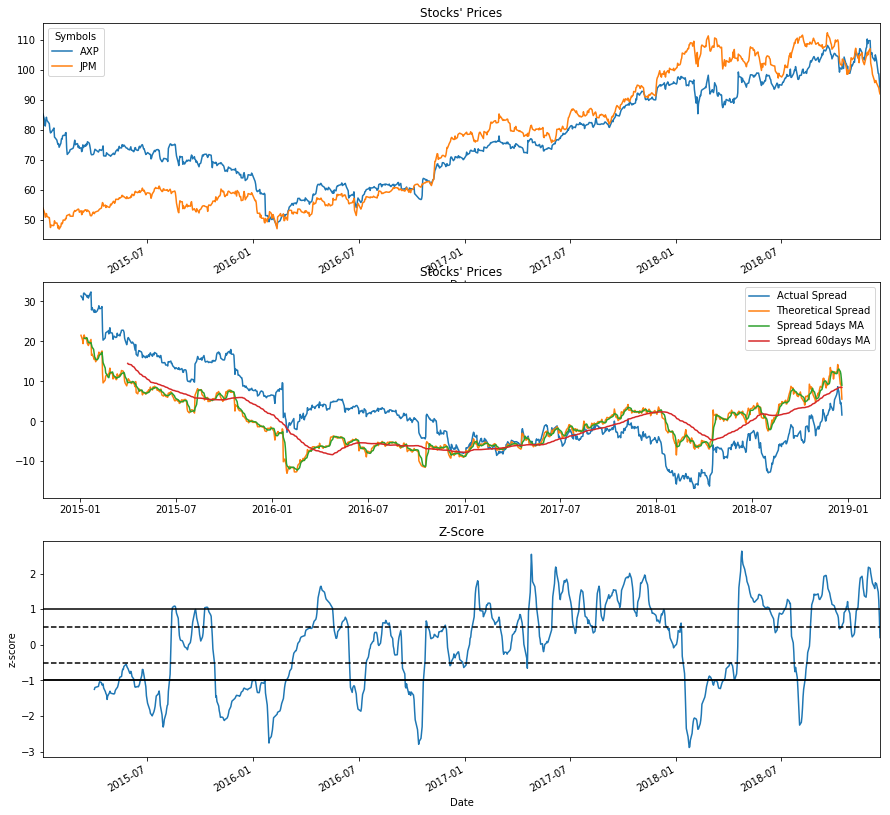

In [11]:
pair2_analysis.plot_data()

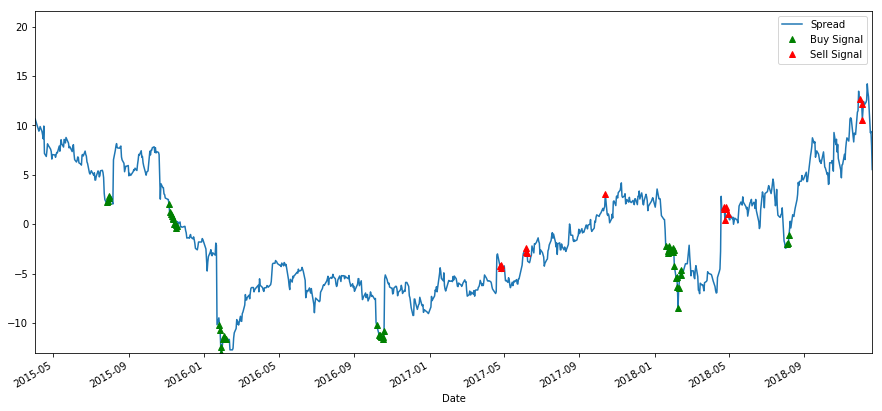

In [12]:
pair2_analysis.trading_signal()

In [13]:
print('This strategy yields a profit and loss of ${:,.2f}'.format(pair2_analysis.pnl))

This strategy yields a profit and loss of $-177.23


In [14]:
pair2_analysis.trade_log.head()

,Date,Action,Ratio,AXP,JPM
0,2015-04-01,Buy Ratio,1.398662,1,-1.398662
1,2015-04-02,Buy Ratio,1.399004,2,-2.797666
2,2015-04-08,Buy Ratio,1.369285,3,-4.166951
3,2015-04-09,Buy Ratio,1.368051,4,-5.535002
4,2015-04-10,Buy Ratio,1.370355,5,-6.905357


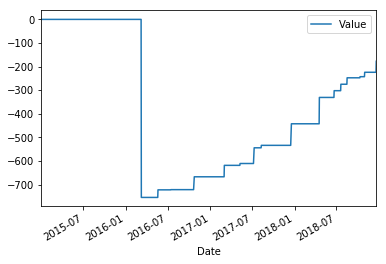

In [15]:
pair2_analysis.plot_value()

Just looking at pair 2 alone, we see that this strategy yields a negative pnl. Now we shall expand the strategy to our portfolio of 6 pairs.

In [16]:
train_results_log = []
train_total_pnl = 0
train_tradelogs = {}

for idx, pair in enumerate([pair2, pair3, pair6, pair10, pair12, pair13]):
    train_results = {}
    pair_analysis = pairs_trading(stock_data_train, pair)
    train_results['Pair'] = pair
    train_results['PnL'] = pair_analysis.pnl
    train_results_log.append(train_results)
    train_tradelogs[pair_analysis.ID] = pair_analysis.trade_log
    train_total_pnl += pair_analysis.pnl
    train_value_over_time = pair_analysis.value_over_time if idx == 0 \
    else train_value_over_time + pair_analysis.value_over_time

train_results_df = pd.DataFrame(train_results_log)
print(train_results_df)

print('The total profit and loss of the portfolio is ${:,.2f}'.format(train_total_pnl))

C:\Users\clee0\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


           Pair         PnL
0    [AXP, JPM] -177.230563
1      [AXP, V]  731.846566
2   [RDS-A, BP]  394.529696
3  [RDS-A, TOT]  358.166901
4      [E, TOT]  228.095335
5       [E, BP]  457.350317
The total profit and loss of the portfolio is $1,992.76


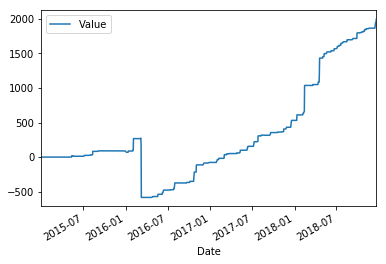

In [17]:
train_value_over_time.plot.line()

Overall, our strategy perfectly, with a gain of nearly $2,000 dollars. 

As pairs trading is a type of statistical arbitrage strategy, it starts with portfolio value of zero. In order to measure the cummulative return of the portfolio, we would need to assume a buy-in cost to own a stake of the portfolio. Let's assume the by-in to be at $100 per stake.

In [18]:
# Assume a $100 buy-in
portfolio_train_price = train_value_over_time + 100
portfolio_train_returns = np.log(portfolio_train_price/portfolio_train_price.shift(1))

C:\Users\clee0\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


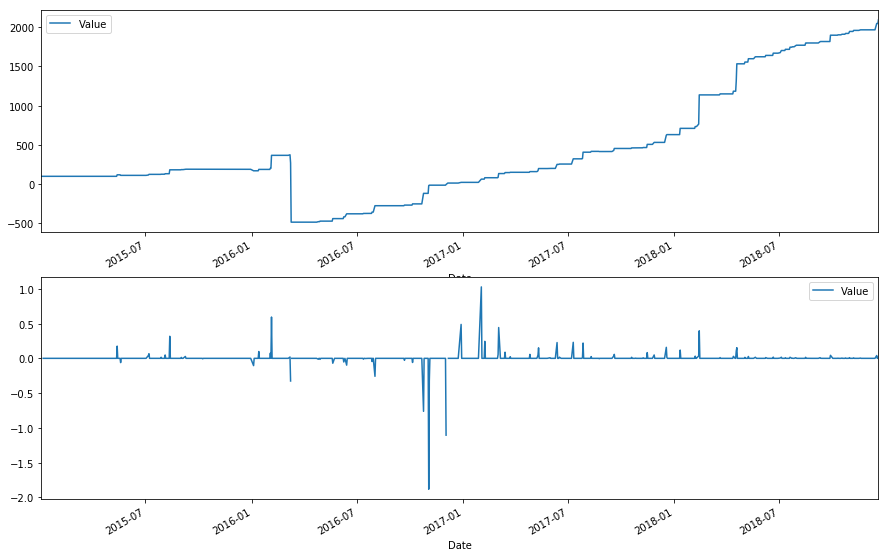

In [19]:
f, ax = plt.subplots(2,1,figsize=(15,10))
portfolio_train_price.plot.line(ax=ax[0])
portfolio_train_returns.plot.line(ax=ax[1])

In [20]:
Abs_return_train = train_total_pnl
Cum_return_train = train_total_pnl/100 - 1
Annual_return_train = (train_total_pnl/100)**(1/4) - 1
stdev_return_train = portfolio_train_returns.std()[0]

print('Expected Absolute Return: ${:,.2f}'.format(Abs_return_train))
print('Expected Cummulative Return: {:.2f}%'.format(100*(Cum_return_train)))
print('Expected Annualized Return: {:.2f}%'.format(100*(Annual_return_train)))
print('Expected Standard Deviation on Return: {:.2f}%'.format(stdev_return_train*100))

Expected Absolute Return: $1,992.76
Expected Cummulative Return: 1892.76%
Expected Annualized Return: 111.28%
Expected Standard Deviation on Return: 9.28%


According to our train set, pair 2 resulted in the most lost (in fact it is the only lost). Hence, according to our strategy, we shall drop the pair from our portfolio.

## Implementing Trading Strategy - Testing

In [21]:
test_results_log = []
test_total_pnl = 0
test_tradelogs = {}

for idx, pair in enumerate([pair3, pair6, pair10, pair12, pair13]):
    test_results = {}
    pair_analysis_test = pairs_trading(stock_data_test, pair)
    test_results['Pair'] = pair
    test_results['PnL'] = pair_analysis_test.pnl
    test_results_log.append(test_results)
    test_tradelogs[pair_analysis_test.ID] = pair_analysis_test.trade_log
    test_total_pnl += pair_analysis_test.pnl
    test_value_over_time = pair_analysis_test.value_over_time if idx == 0 \
    else test_value_over_time + pair_analysis_test.value_over_time

test_results_df = pd.DataFrame(test_results_log)
print(test_results_df)

print('The total profit and loss of the portfolio is ${:,.2f}'.format(test_total_pnl))

           Pair         PnL
0      [AXP, V]  216.722544
1   [RDS-A, BP]  100.508719
2  [RDS-A, TOT]   14.256971
3      [E, TOT]   26.957728
4       [E, BP]   45.657726
The total profit and loss of the portfolio is $404.10


In [22]:
# Assume a $100 buy-in
portfolio_test_price = test_value_over_time + 100
portfolio_test_returns = np.log(portfolio_test_price/portfolio_test_price.shift(1))

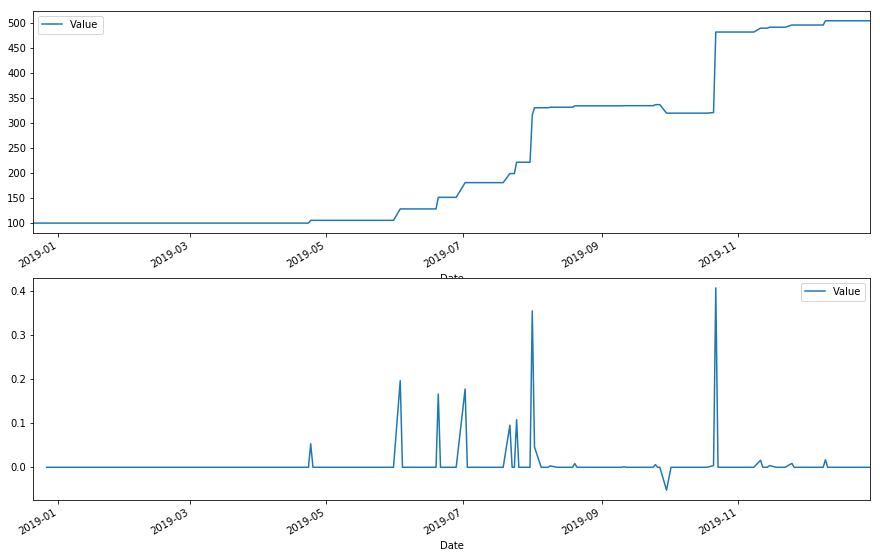

In [23]:
f, ax = plt.subplots(2,1,figsize=(15,10))
portfolio_test_price.plot.line(ax=ax[0])
portfolio_test_returns.plot.line(ax=ax[1])

In [24]:
Abs_return_test = test_total_pnl
Cum_return_test = test_total_pnl/100 - 1
Annual_return_test = (test_total_pnl/100)**(1/4) - 1
stdev_return_test = portfolio_test_returns.std()[0]

print('Expected Absolute Return: ${:,.2f}'.format(Abs_return_test))
print('Expected Cummulative Return: {:.2f}%'.format(100*(Cum_return_test)))
print('Expected Annualized Return: {:.2f}%'.format(100*(Annual_return_test)))
print('Expected Standard Deviation on Return: {:.2f}%'.format(stdev_return_test*100))

Expected Absolute Return: $404.10
Expected Cummulative Return: 304.10%
Expected Annualized Return: 41.78%
Expected Standard Deviation on Return: 4.14%


The following shows what would have happened if we include pair 2:

In [25]:
pair2_analysis_test = pairs_trading(stock_data_test, pair2)
print('Pair 2 yields a profit and loss of ${:,.2f}'.format(pair2_analysis_test.pnl))

Pair 2 yields a profit and loss of $-564.87


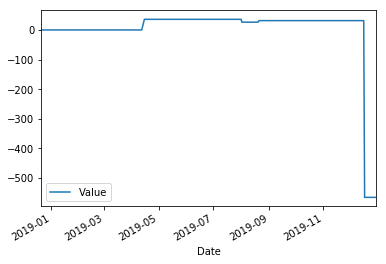

In [26]:
pair2_analysis_test.plot_value()

Pair 2 once again showed negative returns, showing that the pair is not suitable for pairs trading. Thus the strategy is sound in this case.

## Forecasting the spread using ARMA model

While stock prices are hard to forecast, the spread between stocks tends to be a stationary time series. Hence, other than using regression, an ARMA model can be used for pairs trading too. Here, we shall attempt to apply the ARMA model on pair 10, and to analysis the performance of the model.

In [27]:
from pandas.plotting import autocorrelation_plot

In [28]:
pair10_train_data = stock_data_train[pair10]
pair10_train_spread = pair10_train_data[pair10[0]] - pair10_train_data[pair10[1]]

Here, we conduct a Augmented Dickey Fuller test to test for stationarity in the spread of pair 10.

In [29]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(pair10_train_spread)
print('ADF Statistic: {}'.format(adf_test[0]))
print('p-value: {}'.format(adf_test[1]))

ADF Statistic: -2.8271937554741045
p-value: 0.05449309840382836


Using a significant level of 10%, the p-value rejects null in favour of alternative hypothesis, the series is stationary. 

C:\Users\clee0\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


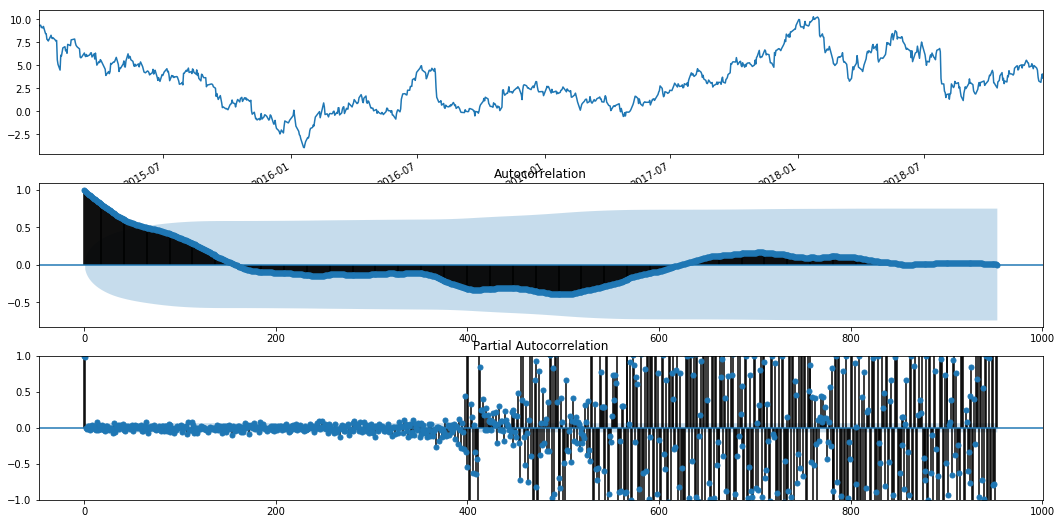

In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Original Series
fig, ax = plt.subplots(3, 1, figsize=(18,10))
pair10_train_spread.plot.line(ax = ax[0])

plot_acf(pair10_train_spread.dropna(), ax=ax[1])

ax[2].set_ylim([-1,1])
plot_pacf(pair10_train_spread.dropna(), ax=ax[2])

plt.show()

By studying the ACF and PACF charts, the data exhibits autoregressive characteristics but not moving average. Thus, we shall fit the data with a ARIMA(1,0,0) (or simply AR) model.

In [31]:
from statsmodels.tsa.arima_model import ARIMA

train_model = ARIMA(pair10_train_spread.values, order=(1,0,0))
train_model_fit = train_model.fit(disp=0)
print(train_model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  954
Model:                     ARMA(1, 0)   Log Likelihood                -510.433
Method:                       css-mle   S.D. of innovations              0.412
Date:                Sun, 26 Apr 2020   AIC                           1026.867
Time:                        08:16:25   BIC                           1041.449
Sample:                             0   HQIC                          1032.421
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7885      1.243      3.047      0.002       1.352       6.225
ar.L1.y        0.9901      0.005    217.173      0.000       0.981       0.999
                                    Roots           

p-value shows that the parameters estimated are significant.

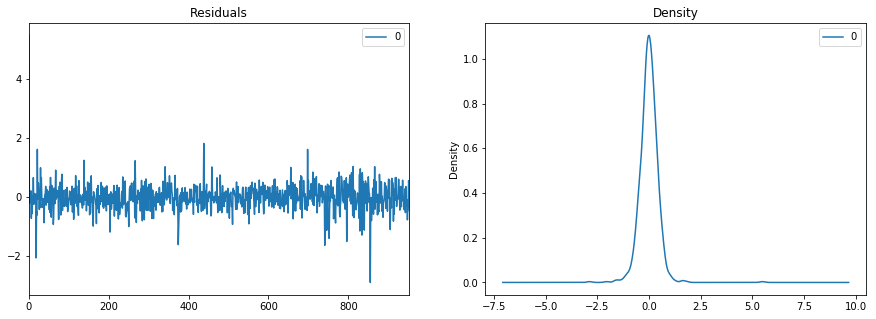

In [32]:
# Plot residual errors
residuals = pd.DataFrame(train_model_fit.resid)
fig, ax = plt.subplots(1,2, figsize = (15,5))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

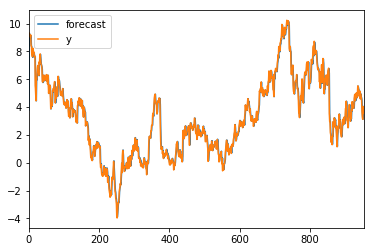

In [33]:
train_model_fit.plot_predict(dynamic=False)
plt.show()

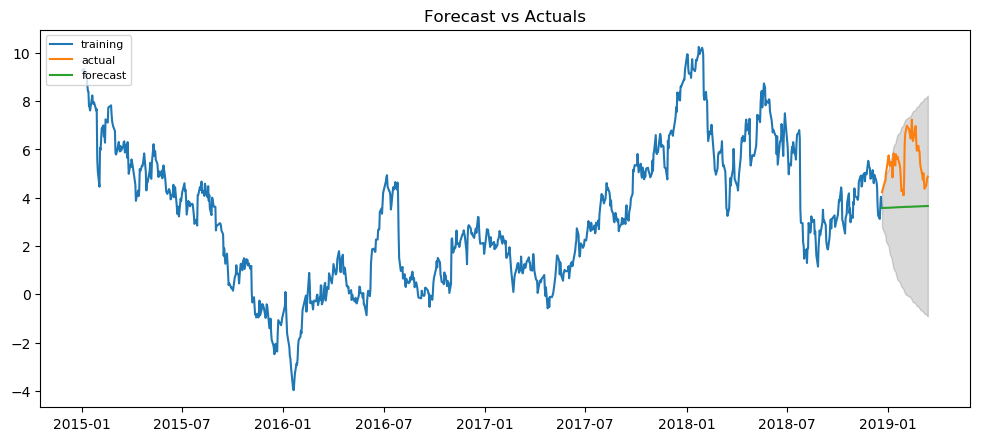

In [34]:
# Build Model
window = 50
pair10_test_data = stock_data_test[pair10]
pair10_test_spread = pair10_test_data[pair10[0]] - pair10_test_data[pair10[1]]

  
model = ARIMA(pair10_train_spread.values, order=(1, 0, 0))  
fitted = model.fit(disp=-1)  

# Forecast
forecast, SError, conf = fitted.forecast(window, alpha=0.05)  # 95% conf

# Make as pandas series
forecasted_series = pd.Series(forecast, index=pair10_test_spread.index[:window])
lower_bound = pd.Series(conf[:, 0], index=pair10_test_spread.index[:window])
upper_bound = pd.Series(conf[:, 1], index=pair10_test_spread.index[:window])

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(pair10_train_spread, label='training')
plt.plot(pair10_test_spread[:window], label='actual')
plt.plot(forecasted_series, label='forecast')
plt.fill_between(lower_bound.index, lower_bound, upper_bound,color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

The actual data lies on the upper boundary and momentarily exceeded the boundary before returning back to bounded zone. This shows that the model is somewhat useful as an alternative to the OLS Regression model for pairs trading, and worth the time to explore further. 

However, one needs to note that unlike simple models such as OLS Regression, each pair exhibit different characteristics and the correct ARIMA model needs to be fitted to each pair data to forecast the spread. Computationally, the ARIMA model would be more consuming for our grander strategy. The ARIMA model may be more suitable for a single pair trade.